# **TP COMPRESSED SENSING - INSA 5A GM - 2022-2023**

# Part 1 : Part 1 Denoising sparse 1D signals


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import plotly.express as px
import plotly.graph_objects as go
import random
random.seed(10)

## (a) 

Generate vector $x,$ where $n=128$ and $k=5.$ Permute them randomly.

In [ ]:
n = 128 # the length of the signal
k = 5 # 5-sparse vectors
x = np.zeros(n) 
x[:k] = np.arange(1,k+1)/k
np.random.shuffle(x)
print(x[x!=0])

[0.6 1.  0.2 0.8 0.4]


In [ ]:
# signal x
print(x)

[0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.2
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.
 0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]


Graph reporting the signal as a function of the position in the vector.

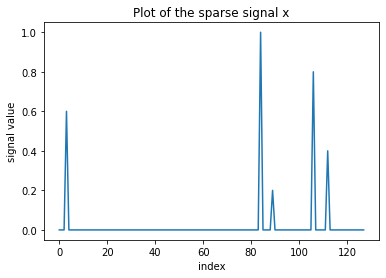

In [ ]:
plt.plot(x)
plt.xlabel('index')
plt.ylabel('signal value')
plt.title(r'Plot of the sparse signal x')
plt.show()

## (b)

Noisy signal,  $y=x +N$,  with random Gaussian noise $N$ with standard deviation $\sigma = 0.05.$

In [ ]:
# Generating random Gaussian distribution.
mu = 0
sigma = 0.05
N = np.random.normal(mu, sigma, len(x))

In [ ]:
# Noisy Signal
y = x + N

Plot of the noisy signal.

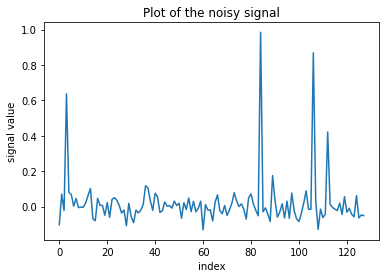

In [ ]:
plt.plot(y)
plt.xlabel('index')
plt.ylabel('signal value')
plt.title(r'Plot of the noisy signal')
plt.show()

## (c) 
One approach for denoising consists in using regularization with Tichonov penalty to estimate the signal from noisy data. This optimization trades the norm of the solution with data consistency. It has two main advantages. First of all, it has a closed form solution, and secondly, the estimate is a linear function of the noisy data. 

We consider then the following problem: 
$$
\hat{x} = \arg \min_{z \in {R}^n} \frac{1}{2} \left\| z-y \right\|^2_2 + \frac{\lambda}{2} \left\| z\right\|^2_2
$$
and we will prove that it admits a closed form solution.

In order to get the solution, the procedure is to compute the derivative of the expression with respect to $z$ and equal it to zero to get its minimum value:

\begin{align}
\frac{\partial}{\partial z} \left(\frac{1}{2} \left\|z-y\right\|^2_2 +\frac{\lambda}{2}\left\|z\right\|^2_2\right) &= 0 \\
\frac{\partial}{\partial z} \left(\frac{\lambda}{2} (z-y)^2 +\frac{\lambda}{2}z^2\right)&= 0 \\
(z-y)+ \lambda z &=0 \\
\frac{1}{1+\lambda}y  &= z
\end{align}

Therefore the solution $\hat{x}$ that minimizes our problem is just the result computed above, i.e., $\hat{x}=\frac{1}{1+\lambda}y.$


## (d)

Now, we will compute the estimate 
$\hat{x}=\frac{1}{1+\lambda}y$ and plot it for $\lambda \in \{0.1, 0.05, 0.1, 0.2\}.$




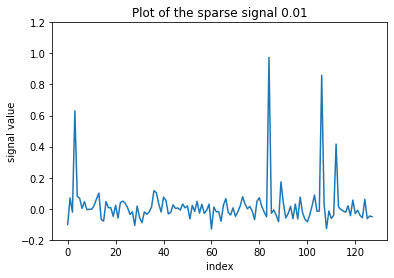

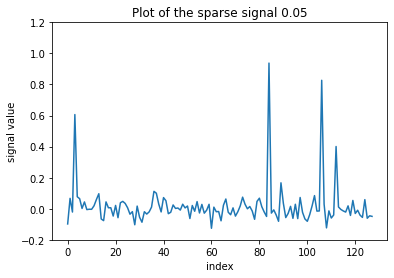

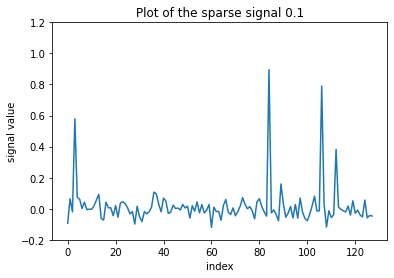

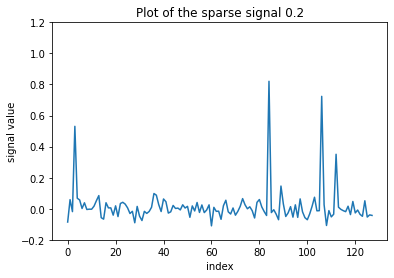

In [ ]:
lambdas = [0.01, 0.05, 0.1, 0.2]

for i in range(len(lambdas)):
    x_hat = (1/(1+lambdas[i]))*y # computation of the estimate
    plt.plot(x_hat)
    plt.xlabel('index')
    plt.ylabel('signal value')
    plt.title(r'Plot of the sparse signal '+str(lambdas[i]))
    plt.ylim(-0.2, 1.2)
    plt.show()

By looking at the graphs we generated we can see that the signals we try to recover are not sparse and that's because the $\ell_2$ norm shrinks the coefficients but does not make them 0. Furthermore, as our input is a noisy signal, and the solution is computed by multiplying our vector $y$ by a constant, we end up with a noisy solution, and not the true one.

# (e)

Instead of Tichonov regularization, which penalizes the $l_2$ norm, we will use the $l_1$ norm penalized solution. More precisely, we will solve for $λ ≥ 0$:
$$
\hat{x} = \arg \min_{z \in {R}^n} \frac{1}{2} \left\| z-y \right\|^2_2 + \lambda \left\| z \right\|_1
$$
The above problem is know as Basis Pursuit Denoising (BPDN). This problem is convex as it is the sum of two convex functions, therefore we can consider each function separately. As in exercise (c), we will compute the derivative with respect to $z:$
$$
\begin{equation}
\frac{\partial}{\partial z} \left(\frac{1}{2} \left\| z-y \right\|^2_2\right) + \partial \lambda | z| = 0
\end{equation}
$$

We consider then: 

* $g'_{+}(0) = \lambda -y $ 
* $g'_{-}(0) = -\lambda - y$

The solution will depend on the sign of $z$, so we will consider three cases:

* $z = 0$ is the solution $\iff g'_{+}(0)\geq 0$ and $g'_{-}(0)\leq 0.$
* $z \geq 0$ is the solution $\iff g'_{+}(0)\leq 0$ which implies that $\hat{x} = y-\lambda.$
* $z \leq 0$ is the solution $\iff g'_{-}(0)\leq 0$ which implies that $\hat{x} = y+\lambda.$



Thus, the solution to this problem can be expressed as $\hat{x} = sign(y)(|y|-\lambda)_+$

We have used in the course the Basis Pursuit instead of a closed form solution. The Basis Pursuit is defined as follows:
\begin{equation}
\min _{z \in \mathbb{R}^n} \|z\|_{1} \\
s.t. \thinspace y=Mz
\end{equation}
The algorithm of Basis Pursuit is the convex relaxation of the minimization problem $\ell_0$ obtained by convexizing the objective function and it can be solved using linear programming. In the case of exact recovery $D(y)=x$
which is different from this problem. 

## (f)
Write the Soft-Thresholding or Shrinkage function seen in (e).

In [ ]:
def softThresh(y, lambdaa):
  n = len(y)
  x_hat = np.zeros(n)
  for i in range(n):
      if y[i] <= -lambdaa:
          x_hat[i] = y[i] + lambdaa
      elif abs(y[i]) < lambdaa:
          x_hat[i] = 0
      elif y[i] >= lambdaa:
          x_hat[i] = y[i] - lambdaa
  return x_hat

Plot $SoftThres(u,λ)$ for $u \in [-10, 10]$ and $λ=2.$

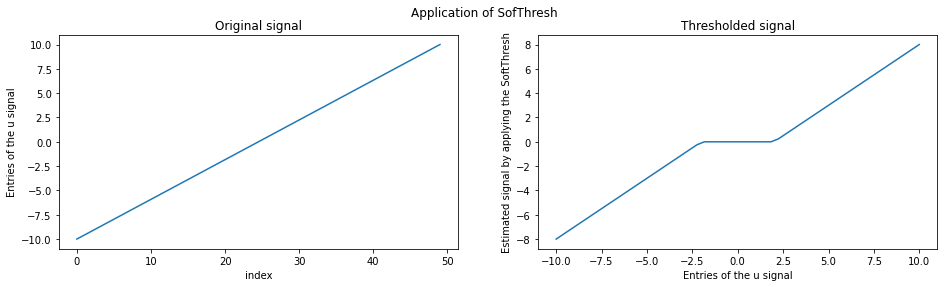

<Figure size 576x432 with 0 Axes>

In [ ]:
u = np.linspace(-10, 10)
lambdaa = 2

cm = 1/2.54
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(40*cm, 10*cm))
fig.suptitle('Application of SofThresh')
fig = plt.figure(figsize=(8, 6))
ax1.plot(u)
ax2.plot(u, softThresh(u, lambdaa))
ax1.set_title('Original signal')
ax2.set_title('Thresholded signal')
ax1.set_ylabel('signal value')
ax1.set(xlabel='index', ylabel='Entries of the u signal')
ax2.set(xlabel='Entries of the u signal', ylabel='Estimated signal by applying the SoftThresh')
plt.show()

Based on the graph above we can see more in detail that the signal is sparse between approximately the interval [-$\lambda$,$\lambda$]. So, intuitively, we can deduce that the larger the value of $\lambda$ is, the sparsier our signal will be due to the wider range in which we will have zero values. But, with that being said, it's still dependent on the size of the noise.

The idea is that thresholding will put the entries of the signal that have their absolute value smaller than $\lambda$ at zero which will enable to get rid of the noise present in the signal. In conclusion, when the absolute value of an entry of $y$ is smaller than $\lambda$, the algorithm will consider it as noise and will shrink it to zero which will allow to remove noise from the signal.

In conclusion, the smaller $y_l$ is compared to $\lambda$ the sparsiest the signal will be.

# (g)
Apply $SoftThresh$ to the noisy signal $y$ for $\lambda \in \{0.1, 0.05, 0.1, 0.2\}.$

In [ ]:
noisy_signal = x + N  # noisy signal
lambdas = [0.01,0.05,0.1,0.2]
signals = []
for (index,lambdaa) in enumerate(lambdas):
  fig=go.Figure()

  signals.append(softThresh(noisy_signal, lambdaa))

  fig.add_trace(go.Scatter(
    y=signals[index],
    name="reconstructed signal"       
  ))


  fig.add_trace(go.Scatter(
    y=noisy_signal,
    name="noisy signal"
  ))
   
  fig.add_trace(go.Scatter(
    y=x,
    name="original signal"
  ))
    

  fig.update_layout(
    title="Reconstruction of the signal x, lambda : "+str(lambdaa),
    xaxis_title="index",
    yaxis_title='Signal entries value'  
  )

  fig.show()

In [ ]:
print("The reconstrued signal for lambda=0.01 is k = "+str(len(signals[0][signals[0]!=0]))+ " sparse")
print("The reconstrued signal for lambda=0.05 is k = "+str(len(signals[1][signals[1]!=0]))+ " sparse")
print("The reconstrued signal for lambda=0.1 is k = "+str(len(signals[2][signals[2]!=0]))+ " sparse")
print("The reconstrued signal for lambda=0.2 is k = "+str(len(signals[3][signals[3]!=0]))+ " sparse")


The reconstrued signal for lambda=0.01 is k = 112 sparse
The reconstrued signal for lambda=0.05 is k = 44 sparse
The reconstrued signal for lambda=0.1 is k = 12 sparse
The reconstrued signal for lambda=0.2 is k = 4 sparse


As we can see, the bigger lambda is, the sparsiest our $\hat{x}$ is. By looking at the interactive graph above, simply hover over the signal, both the reconstructed signal and the original one have non zero coefficients at almost the same positions as lambda gets bigger. Also, the values of the non-zero coefficients are quite similar.

Therefore, the solution $\hat x$ is sparse and it gets more sparse as the value of $λ$ increases. 